In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../EDA/CustomerChurn.csv')
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.dropna(how='any',inplace=True)

In [7]:
(df.Churn.value_counts()/len(df.Churn))*100

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

In [8]:

X = df.drop(['customerID','Churn'],axis=1)
y= df.Churn.values

print(df.columns)
print(type(X))



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [9]:
# Feature Encoding

X = pd.get_dummies(X,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)



In [10]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   gender_Male                            7032 non-null   bool   
 4   SeniorCitizen_1                        7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

In [11]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
print(len(y_test))
print(len(X_train))

1758
5274


In [ ]:
# Feature Scaling


from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)



In [ ]:
X_train_sc

array([[ 1.5728248 ,  0.69155467,  1.77616094, ..., -0.52689304,
         1.430662  , -0.55354824],
       [-1.16030113, -1.4613163 , -0.97489162, ..., -0.52689304,
        -0.69897712,  1.80652728],
       [ 1.36886018,  0.33080332,  1.11247249, ...,  1.8979184 ,
        -0.69897712, -0.55354824],
       ...,
       [-0.83395774, -1.31003348, -0.88581526, ...,  1.8979184 ,
        -0.69897712, -0.55354824],
       [-1.24188698,  0.20944457, -0.94622286, ..., -0.52689304,
         1.430662  , -0.55354824],
       [ 1.28727433, -0.15296923,  0.69151878, ..., -0.52689304,
        -0.69897712, -0.55354824]])

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Decision Classifier


# Initiating

model = DecisionTreeClassifier(max_depth=2) # better accuracy than default maxdepth

model.fit(X_train_sc,y_train)


DecisionTreeClassifier(max_depth=2)

In [24]:

# pass testing data for predictions

y_pred = model.predict(X_test_sc)

In [ ]:
# Classification Metrics

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred) #less than knn
#defaukt max depth - accuracy - 0.71


0.7986348122866894

In [26]:
### new data prediction

data = X_test_sc[2].reshape(1, -1)

print(data)


[[ 0.18586537 -0.10642067  0.0098737   0.99659284 -0.44140074 -0.96680032
   1.52904372  0.33037594 -0.33037594 -0.84104022 -0.88212947 -0.52601184
  -0.52601184  1.57372124 -0.52601184  1.38108182 -0.52601184 -0.72711461
  -0.52601184  1.56143216 -0.52601184 -0.78852471 -0.52601184 -0.79772404
  -0.51807168  1.77744367 -1.20636117  1.8979184  -0.69897712 -0.55354824]]


In [27]:
single_pred_prob = model.predict_proba(data)
single_pred = model.predict(data)

print(single_pred)

['No']


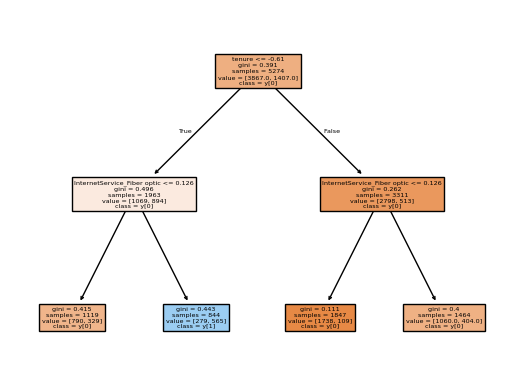

In [28]:
# Visualising

#graphviz, dtreeviz, plot_tree

from sklearn.tree import plot_tree

plot_tree(model,filled=True,feature_names = X_train.columns, class_names=True, max_depth=2)
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="tree.dot",feature_names = X_train.columns , class_names= True , filled=True, proportion = True, special_characters=True)


In [52]:
with open ("./tree.dot") as f:
    dot_data = f.read()
    
graph =graphviz.Source(dot_data,format ='png')


    

In [55]:
# graph.render("tree", view=True)
# # need to download graphviz on sysytem to view